# Teste para P = 2


In [1]:
# Importar as variaveis
from dados_previsao import x_train, x_test, y_binary_train, y_binary_test

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5, 7, 11, 9, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [2]
}

# GridSearch focando em PRECISION
grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall', n_jobs=6)

grid.fit(x_train, y_binary_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor sensibilidade:", grid.best_score_)

Melhores parâmetros: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Melhor sensibilidade: 0.8248526020161441


In [2]:
# Treinar modelo - {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
from sklearn.neighbors import KNeighborsClassifier
knn_trained = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
knn_trained.fit(x_train, y_binary_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [3]:
# Prever
previsao = knn_trained.predict(x_test)

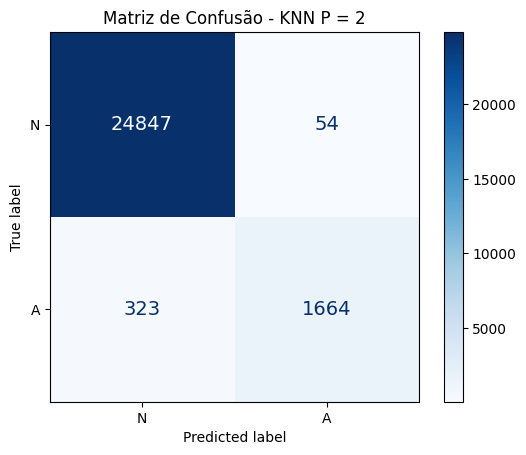

Accuracy: 98.60%
Recall: 83.74%
ROC: 0.9176
F1-Score: 0.8982
Precision: 96.86%
Specificity: 99.78%


In [5]:
# Analise geral
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, precision_score
from imblearn.metrics import specificity_score
from matplotlib import pyplot as plt

cm = confusion_matrix(y_binary_test, previsao)

# Exibir a matriz de confusão como gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["N", "A"])
disp.plot(cmap="Blues", values_format="d", text_kw={'size': 14})  
plt.title("Matriz de Confusão - KNN P = 2")
plt.show()

acc = accuracy_score(y_binary_test, previsao)
print(f"Accuracy: {acc*100:.2f}%")

rec = recall_score(y_binary_test, previsao)
print(f"Recall: {rec*100:.2f}%")

roc = roc_auc_score(y_binary_test, previsao)
print(f"ROC: {roc:.4f}")

f1 = f1_score(y_binary_test, previsao)
print(f"F1-Score: {f1:.4f}")

precision = precision_score(y_binary_test, previsao)
print(f"Precision: {precision*100:.2f}%")

specificity = specificity_score(y_binary_test, previsao)
print(f"Specificity: {specificity*100:.2f}%")
